Imports

In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

Importing Data

In [32]:
file_path = 'DataSet.csv' 
df = pd.read_csv(file_path)

# 1. Drop unnecessary columns (like 'index')
df.drop(columns=['index'], inplace=True)

# 2. Handle missing values (fill NaN with the mean of the column)
df.fillna(df.mean(), inplace=True)

# Define scaling criteria
def needs_scaling(row):
    if row['cpu'] > 70 or row['ram'] > 85 or row['disk'] > 70 or row['network'] > 15:
        return 1  # Scaling needed
    return 0  # No scaling needed

# Display the updated dataframe
print(df.head())


   cpu  ram  disk  network
0   79   58    50       10
1   78   54    52       11
2   79   64    67       13
3   78   66    68        9
4   75   57    58       11


Featuer Engneering

In [33]:
df.fillna(df.mean(), inplace=True)

# 3. Feature Engineering

# Example 1: Combining 'cpu' and 'ram' to create a new feature 'cpu_ram_usage'
df['cpu_ram_usage'] = df['cpu'] * df['ram']

# Example 2: Combining 'disk' and 'network' to create a new feature 'disk_network_load'
df['disk_network_load'] = df['disk'] + df['network']

# Example 3: Creating a feature that shows the ratio of 'cpu' to 'ram' as 'cpu_ram_ratio'
df['cpu_ram_ratio'] = df['cpu'] / (df['ram'] + 1e-5)  # Adding a small value to avoid division by zero

# Example 4: Creating a feature that shows the ratio of 'cpu' to 'network' as 'cpu_network_ratio'
df['cpu_network_ratio'] = df['cpu'] / (df['network'] + 1e-5)  # Adding a small value to avoid division by zero

# Display the updated dataframe with new features
print(df.head())

# Apply the criteria to the dataset
df['needs_scaling'] = df.apply(needs_scaling, axis=1)


   cpu  ram  disk  network  cpu_ram_usage  disk_network_load  cpu_ram_ratio  \
0   79   58    50       10           4582                 60       1.362069   
1   78   54    52       11           4212                 63       1.444444   
2   79   64    67       13           5056                 80       1.234375   
3   78   66    68        9           5148                 77       1.181818   
4   75   57    58       11           4275                 69       1.315789   

   cpu_network_ratio  
0           7.899992  
1           7.090903  
2           6.076918  
3           8.666657  
4           6.818176  


Visualization of Feature Distributions

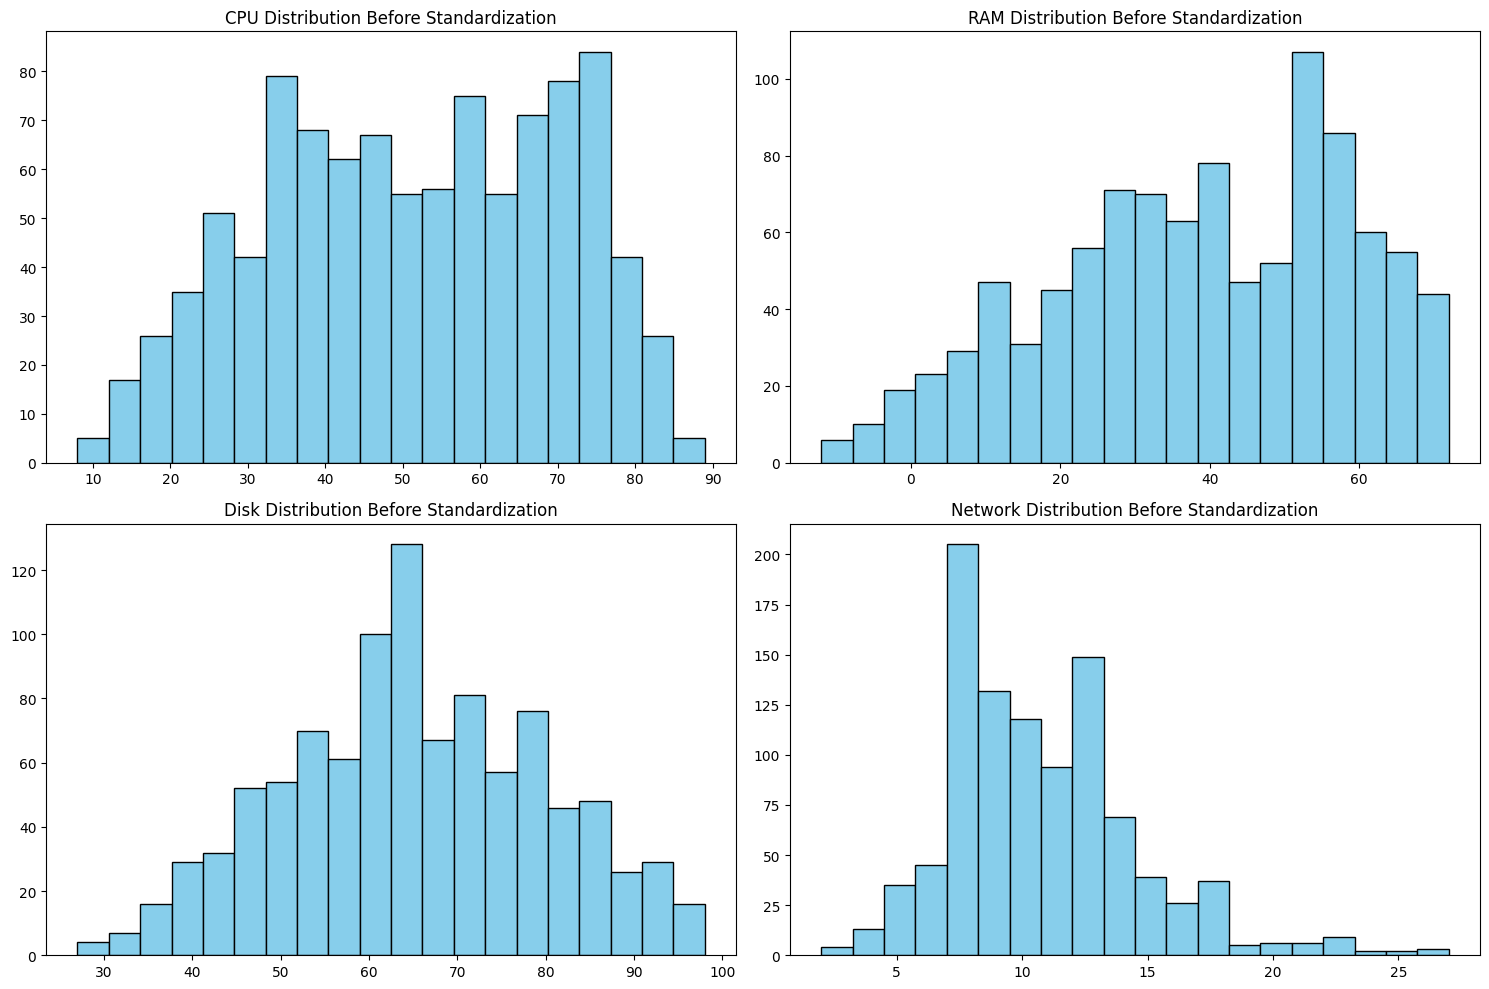

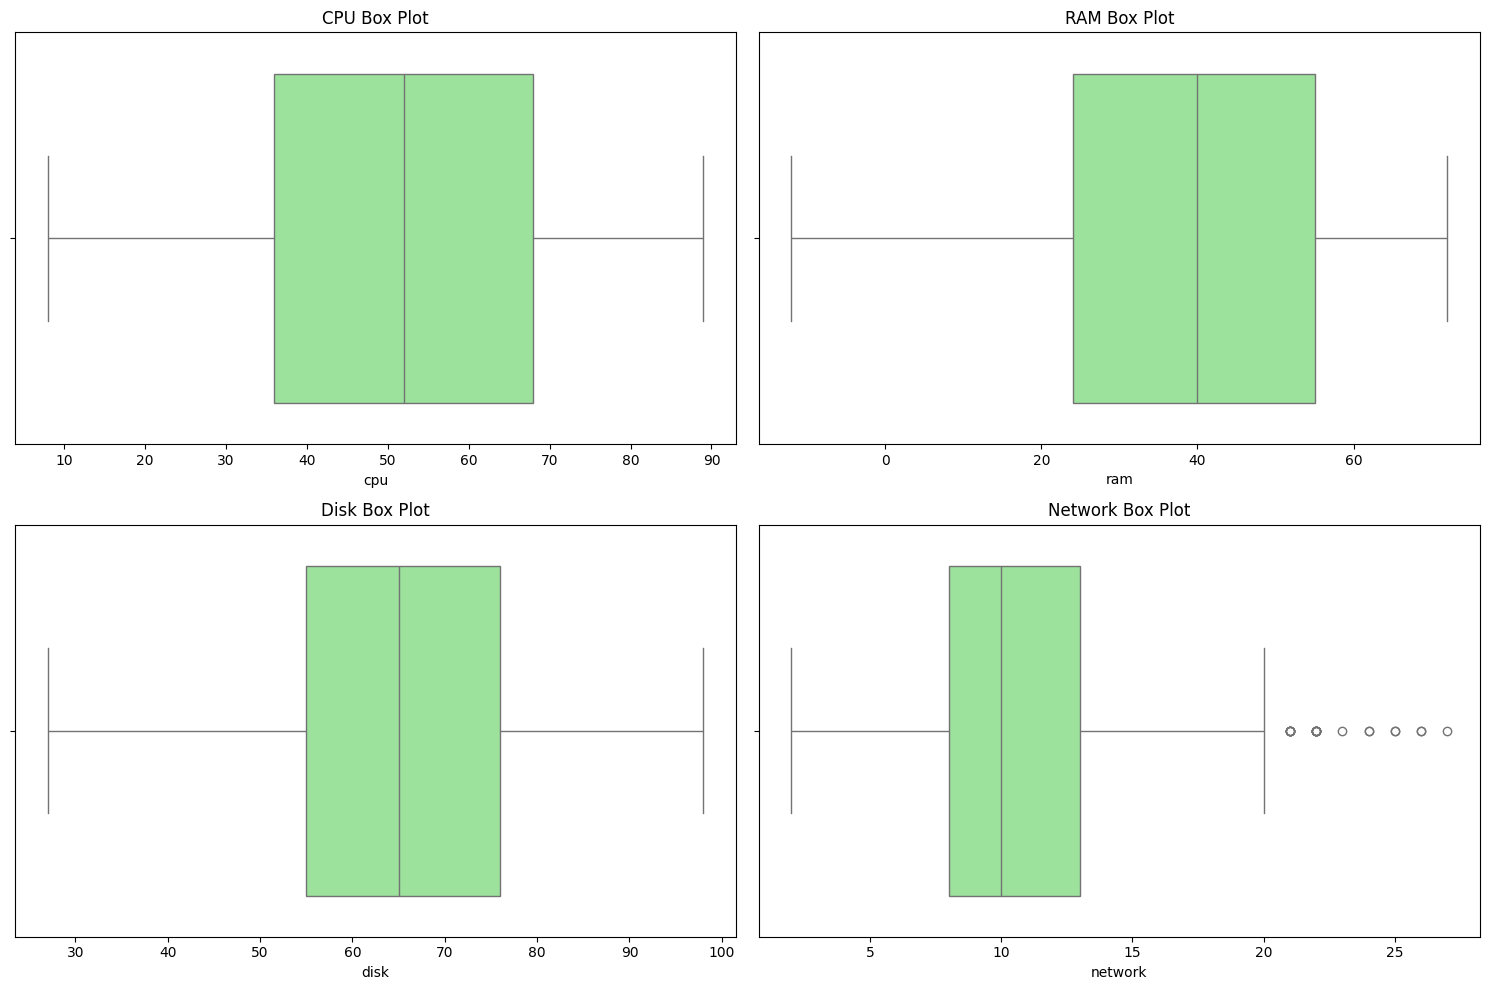

In [34]:
# Visualization - Before and After Preprocessing

# Create subplots for the features
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot before standardization (original data)
axes[0, 0].hist(df['cpu'], bins=20, color='skyblue', edgecolor='black')
axes[0, 0].set_title('CPU Distribution Before Standardization')

axes[0, 1].hist(df['ram'], bins=20, color='skyblue', edgecolor='black')
axes[0, 1].set_title('RAM Distribution Before Standardization')

axes[1, 0].hist(df['disk'], bins=20, color='skyblue', edgecolor='black')
axes[1, 0].set_title('Disk Distribution Before Standardization')

axes[1, 1].hist(df['network'], bins=20, color='skyblue', edgecolor='black')
axes[1, 1].set_title('Network Distribution Before Standardization')

plt.tight_layout()
plt.show()

# Now that the data has been standardized, let's visualize the box plots for detecting outliers
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Box plots for features to detect outliers
sns.boxplot(ax=axes[0, 0], x=df['cpu'], color='lightgreen')
axes[0, 0].set_title('CPU Box Plot')

sns.boxplot(ax=axes[0, 1], x=df['ram'], color='lightgreen')
axes[0, 1].set_title('RAM Box Plot')

sns.boxplot(ax=axes[1, 0], x=df['disk'], color='lightgreen')
axes[1, 0].set_title('Disk Box Plot')

sns.boxplot(ax=axes[1, 1], x=df['network'], color='lightgreen')
axes[1, 1].set_title('Network Box Plot')

plt.tight_layout()
plt.show()


Normalization & Standardization

In [35]:

# 3. Normalize or Standardize the features (optional)
scaler = StandardScaler()
df[['cpu', 'ram', 'disk', 'network']] = scaler.fit_transform(df[['cpu', 'ram', 'disk', 'network']])

# Display the updated dataframe
print(df.head())


        cpu       ram      disk   network  cpu_ram_usage  disk_network_load  \
0  1.490064  0.981825 -1.032321 -0.174789           4582                 60   
1  1.436173  0.780098 -0.896061  0.093024           4212                 63   
2  1.490064  1.284414  0.125895  0.628649           5056                 80   
3  1.436173  1.385277  0.194025 -0.442601           5148                 77   
4  1.274500  0.931393 -0.487279  0.093024           4275                 69   

   cpu_ram_ratio  cpu_network_ratio  needs_scaling  
0       1.362069           7.899992              1  
1       1.444444           7.090903              1  
2       1.234375           6.076918              1  
3       1.181818           8.666657              1  
4       1.315789           6.818176              1  


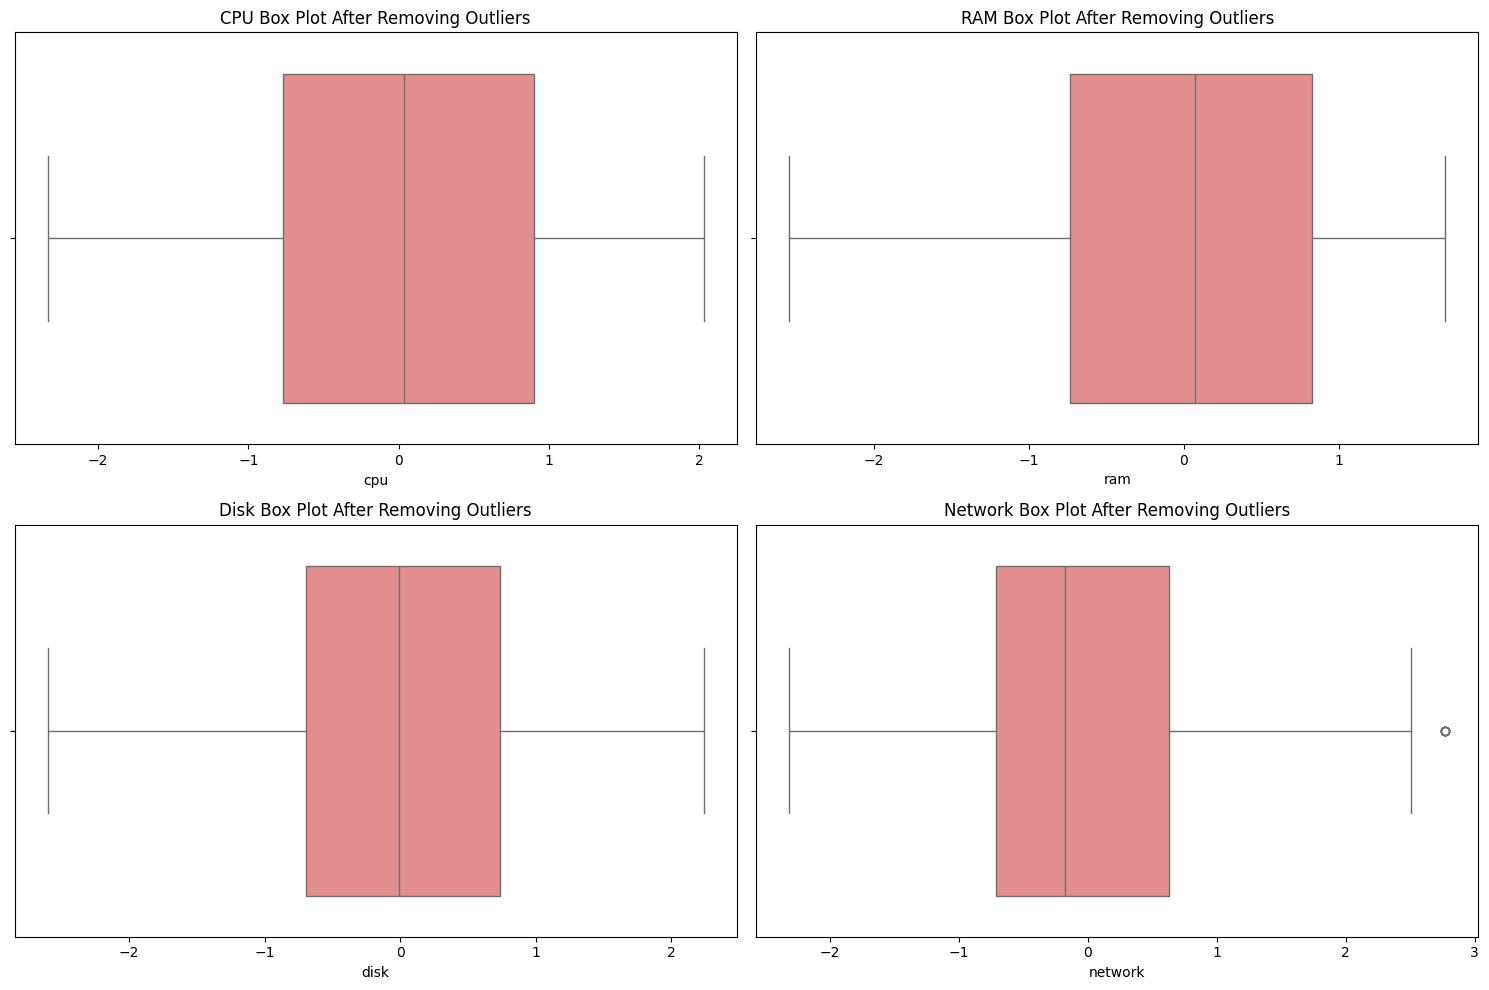

        cpu       ram      disk   network  cpu_ram_usage  disk_network_load  \
0  1.490064  0.981825 -1.032321 -0.174789           4582                 60   
1  1.436173  0.780098 -0.896061  0.093024           4212                 63   
2  1.490064  1.284414  0.125895  0.628649           5056                 80   
3  1.436173  1.385277  0.194025 -0.442601           5148                 77   
4  1.274500  0.931393 -0.487279  0.093024           4275                 69   

   cpu_ram_ratio  cpu_network_ratio  needs_scaling  
0       1.362069           7.899992              1  
1       1.444444           7.090903              1  
2       1.234375           6.076918              1  
3       1.181818           8.666657              1  
4       1.315789           6.818176              1  
Updated data with engineered features saved to 'server_data_with_engineered_features.csv'


In [36]:
# 4. Remove outliers (Z-score method)
z_scores = np.abs((df[['cpu', 'ram', 'disk', 'network']] - df[['cpu', 'ram', 'disk', 'network']].mean()) /
                  df[['cpu', 'ram', 'disk', 'network']].std())

# Remove rows with Z-scores greater than 3 for any feature
df_cleaned = df[(z_scores < 3).all(axis=1)]

# Visualization - After Removing Outliers (Box plots again to confirm)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Box plots for features after removing outliers
sns.boxplot(ax=axes[0, 0], x=df_cleaned['cpu'], color='lightcoral')
axes[0, 0].set_title('CPU Box Plot After Removing Outliers')

sns.boxplot(ax=axes[0, 1], x=df_cleaned['ram'], color='lightcoral')
axes[0, 1].set_title('RAM Box Plot After Removing Outliers')

sns.boxplot(ax=axes[1, 0], x=df_cleaned['disk'], color='lightcoral')
axes[1, 0].set_title('Disk Box Plot After Removing Outliers')

sns.boxplot(ax=axes[1, 1], x=df_cleaned['network'], color='lightcoral')
axes[1, 1].set_title('Network Box Plot After Removing Outliers')

plt.tight_layout()
plt.show()

# Display the cleaned dataframe
print(df_cleaned.head())

# Save the updated dataframe with engineered features
#output_file = 'server_data_with_engineered_features.csv'
#df.to_csv(output_file, index=False)
#print(f"Updated data with engineered features saved to '{output_file}'")
